In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1HizqrBo8embIgBDNsb_Akk1OwUO4v_fX"})  
downloaded.GetContentFile('finaldata.csv') 
df = pd.read_csv('finaldata.csv', encoding="ISO-8859-1")
df

,Age,Sex,rural,urban,Chest pain,Dyspnoea,Height,weight,BMI new,W/H ratio,SBP,DBP,PULSE,METS,HTN
0,53,F,NaN,Y,N,N,159.0,50.0,19.8,0.91,120.0,80.0,80.0,8.2,N
1,55,F,Y,NaN,N,N,156.0,82.0,33.7,0.96,120.0,80.0,80.0,NaN,N
2,41,M,NaN,Y,N,Y,173.0,80.0,26.7,0.87,130.0,80.0,80.0,10.0,N
3,65,M,NaN,Y,N,N,174.0,132.0,43.6,1.04,130.0,70.0,80.0,NaN,Y
4,66,M,NaN,Y,N,Y,165.0,55.0,20.2,0.91,140.0,80.0,80.0,10.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4490,62,F,NaN,NaN,N,Y,156.0,63.0,25.9,0.98,150.0,80.0,80.0,NaN,Y
4491,56,M,NaN,Y,N,Y,174.0,73.0,24.1,0.91,130.0,80.0,84.0,10.0,N
4492,48,M,Y,NaN,N,Y,180.0,87.0,26.9,0.96,170.0,100.0,84.0,NaN,Y
4493,59,M,NaN,Y,N,N,168.0,80.0,28.3,1.00,110.0,70.0,76.0,8.8,N


In [ ]:
df = df.replace({'HTN': {'Y': 1, 'N': 0}})
df = df.replace({'Chest pain': {'Y': 1, 'N': 0}})
df = df.replace({'Dyspnoea': {'Y': 1, 'N': 0}})
df['rural'] = df['rural'].fillna(0)
df = df.replace({'rural': {'Y':1}})
df['urban'] = df['urban'].fillna(0)
df = df.replace({'urban': {'Y':1}})
df = df.replace({'Sex': {'M': 1, 'F': 0}})
df = df.dropna()
df = df.replace({'urban': {'y':1}})
df = df.replace({'rural': {'y':1}})
df = df.replace({'Chest pain': {'y':1}})
df = df.replace({'Dyspnoea': {'y':1}})
df = df.replace({'HTN': {'y':1}})

In [ ]:
df

,Age,Sex,rural,urban,Chest pain,Dyspnoea,Height,weight,BMI new,W/H ratio,SBP,DBP,PULSE,METS,HTN
0,53,0,0,1,0,0,159.0,50.0,19.8,0.91,120.0,80.0,80.0,8.2,0
2,41,1,0,1,0,1,173.0,80.0,26.7,0.87,130.0,80.0,80.0,10.0,0
4,66,1,0,1,0,1,165.0,55.0,20.2,0.91,140.0,80.0,80.0,10.0,0
5,47,1,0,1,0,0,166.0,91.0,33.0,0.86,130.0,70.0,80.0,10.0,0
6,30,1,0,1,0,1,168.0,89.0,31.5,0.91,120.0,80.0,77.0,13.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,55,0,1,0,1,1,146.0,57.0,26.7,0.94,110.0,80.0,72.0,7.9,0
4488,58,0,1,0,0,0,159.0,72.0,28.5,0.96,140.0,80.0,80.0,9.0,1
4489,51,0,0,1,1,0,152.0,63.0,27.3,0.97,110.0,70.0,84.0,8.2,0
4491,56,1,0,1,0,1,174.0,73.0,24.1,0.91,130.0,80.0,84.0,10.0,0


In [ ]:
df.corr()

,Age,Sex,rural,urban,Chest pain,Dyspnoea,Height,weight,BMI new,W/H ratio,SBP,DBP,PULSE,METS,HTN
Age,1.000000,-0.063197,-0.059305,0.032977,-0.105824,0.000990,-0.160960,-0.129672,-0.042354,0.144144,0.065547,0.052635,-0.034762,-0.500327,0.158027
Sex,-0.063197,1.000000,-0.027027,0.009485,-0.015179,-0.113395,0.702958,0.378703,-0.051875,0.186484,0.035922,0.018217,-0.058815,0.468425,0.031585
rural,-0.059305,-0.027027,1.000000,-0.838837,0.059052,0.036097,0.044016,-0.012263,-0.041480,-0.000011,0.054820,-0.002461,-0.007822,0.031243,0.016069
urban,0.032977,0.009485,-0.838837,1.000000,-0.042299,-0.003243,-0.051237,0.009758,0.044134,-0.004724,-0.018525,-0.013211,0.010142,-0.033928,-0.005139
Chest pain,-0.105824,-0.015179,0.059052,-0.042299,1.000000,0.196109,0.000621,0.006312,0.008691,-0.014590,0.084551,-0.099725,0.035289,0.012799,0.069805
Dyspnoea,0.000990,-0.113395,0.036097,-0.003243,0.196109,1.000000,-0.090150,0.082187,0.152755,0.015245,0.105530,-0.110656,0.055247,-0.150584,0.136843
Height,-0.160960,0.702958,0.044016,-0.051237,0.000621,-0.090150,1.000000,0.519243,-0.092342,0.106689,0.015426,0.005516,-0.065472,0.422004,-0.005516
weight,-0.129672,0.378703,-0.012263,0.009758,0.006312,0.082187,0.519243,1.000000,0.773530,0.144875,0.068098,0.028151,0.005729,0.080206,0.094277
BMI new,-0.042354,-0.051875,-0.041480,0.044134,0.008691,0.152755,-0.092342,0.773530,1.000000,0.092481,0.066167,0.030276,0.048699,-0.193844,0.105710
W/H ratio,0.144144,0.186484,-0.000011,-0.004724,-0.014590,0.015245,0.106689,0.144875,0.092481,1.000000,0.024295,0.014942,0.009784,-0.043102,0.059777


In [ ]:
df.corr()['HTN'].sort_values()

DBP          -0.181773
METS         -0.125363
Height       -0.005516
urban        -0.005139
rural         0.016069
Sex           0.031585
W/H ratio     0.059777
Chest pain    0.069805
PULSE         0.073654
weight        0.094277
BMI new       0.105710
Dyspnoea      0.136843
Age           0.158027
SBP           0.334129
HTN           1.000000
Name: HTN, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 4493
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         3818 non-null   int64  
 1   Sex         3818 non-null   int64  
 2   rural       3818 non-null   int64  
 3   urban       3818 non-null   int64  
 4   Chest pain  3818 non-null   int64  
 5   Dyspnoea    3818 non-null   int64  
 6   Height      3818 non-null   float64
 7   weight      3818 non-null   float64
 8   BMI new     3818 non-null   float64
 9   W/H ratio   3818 non-null   float64
 10  SBP         3818 non-null   float64
 11  DBP         3818 non-null   float64
 12  PULSE       3818 non-null   float64
 13  METS        3818 non-null   float64
 14  HTN         3818 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 477.2 KB


In [ ]:
df.describe()

,Age,Sex,rural,urban,Chest pain,Dyspnoea,Height,weight,BMI new,W/H ratio,SBP,DBP,PULSE,METS,HTN
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.00000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.00000,3818.000000,3818.000000
mean,48.684652,0.672080,0.304872,0.616029,0.15977,0.258774,167.008381,78.494788,28.085202,0.922747,107.101886,97.634364,77.53824,9.070946,0.289680
std,10.611242,0.469517,0.460413,0.486415,0.36644,0.438019,9.084735,14.144970,4.337314,0.068308,28.714614,25.522025,10.73118,1.888849,0.453673
min,22.000000,0.000000,0.000000,0.000000,0.00000,0.000000,85.000000,31.000000,13.600000,0.440000,12.000000,0.000000,8.00000,1.100000,0.000000
25%,41.000000,0.000000,0.000000,0.000000,0.00000,0.000000,160.000000,69.000000,25.300000,0.900000,80.000000,80.000000,72.00000,7.500000,0.000000
50%,48.000000,1.000000,0.000000,1.000000,0.00000,0.000000,168.000000,77.000000,27.700000,0.920000,110.000000,90.000000,80.00000,9.200000,0.000000
75%,56.000000,1.000000,1.000000,1.000000,0.00000,1.000000,174.000000,87.000000,30.500000,0.950000,130.000000,120.000000,80.00000,10.100000,1.000000
max,85.000000,1.000000,1.000000,1.000000,1.00000,1.000000,192.000000,167.000000,81.700000,3.900000,876.000000,200.000000,166.00000,16.000000,1.000000


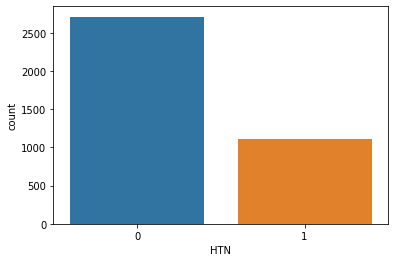

In [ ]:
sns.countplot(x='HTN',data=df)

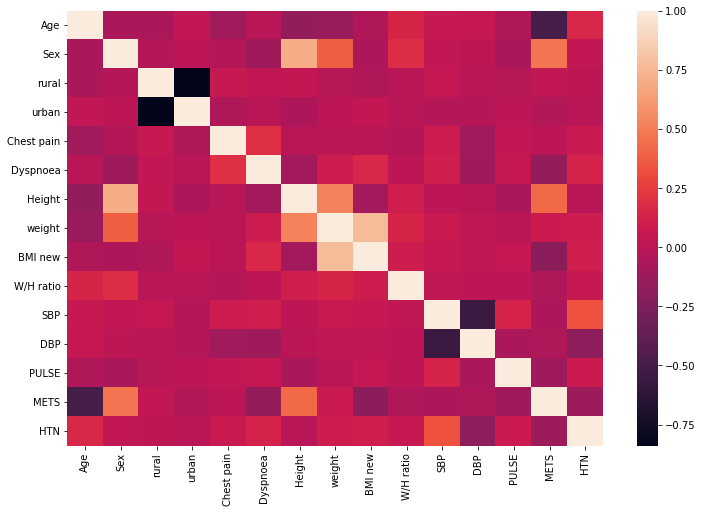

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr())

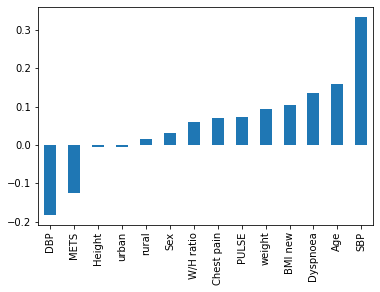

In [ ]:
df.corr()['HTN'][:-1].sort_values().plot(kind='bar')

In [ ]:
X = df.drop('HTN',axis=1).values
y = df['HTN'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [ ]:
X_train.shape

(2672, 14)

In [ ]:
model = Sequential()
model.add(Dense(units=14,activation='relu'))
model.add(Dense(units=21,activation='relu'))
model.add(Dense(units=14,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/500
84/84 [==============================] - 1s 5ms/step - loss: 0.6458 - val_loss: 0.5988
Epoch 2/500
84/84 [==============================] - 0s 3ms/step - loss: 0.5970 - val_loss: 0.5927
Epoch 3/500
84/84 [==============================] - 0s 3ms/step - loss: 0.5879 - val_loss: 0.5889
Epoch 4/500
84/84 [==============================] - 0s 3ms/step - loss: 0.5817 - val_loss: 0.5808
Epoch 5/500
84/84 [==============================] - 0s 3ms/step - loss: 0.5744 - val_loss: 0.5727
Epoch 6/500
84/84 [==============================] - 0s 3ms/step - loss: 0.5686 - val_loss: 0.5674
Epoch 7/500
84/84 [==============================] - 0s 3ms/step - loss: 0.5631 - val_loss: 0.5614
Epoch 8/500
84/84 [==============================] - 0s 2ms/step - loss: 0.5578 - val_loss: 0.5528
Epoch 9/500
84/84 [==============================] - 0s 3ms/step - loss: 0.5509 - val_loss: 0.5483
Epoch 10/500
84/84 [==============================] - 0s 3ms/step - loss: 0.5489 - val_loss: 0.5555
Epoch 11/

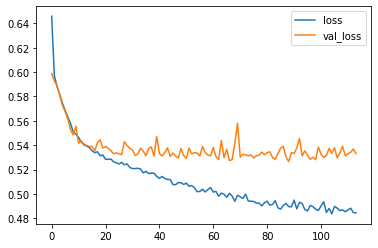

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions)) 

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       815
           1       0.60      0.35      0.44       331

    accuracy                           0.74      1146
   macro avg       0.69      0.63      0.64      1146
weighted avg       0.72      0.74      0.72      1146

[[738  77]
 [216 115]]


In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(units=14,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=21,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=14,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/500
90/90 [==============================] - 1s 8ms/step - loss: 0.6702 - val_loss: 0.6381
Epoch 2/500
90/90 [==============================] - 0s 4ms/step - loss: 0.6366 - val_loss: 0.6159
Epoch 3/500
90/90 [==============================] - 0s 4ms/step - loss: 0.6242 - val_loss: 0.6118
Epoch 4/500
90/90 [==============================] - 0s 3ms/step - loss: 0.6217 - val_loss: 0.6063
Epoch 5/500
90/90 [==============================] - 0s 3ms/step - loss: 0.6109 - val_loss: 0.6042
Epoch 6/500
90/90 [==============================] - 0s 3ms/step - loss: 0.6074 - val_loss: 0.6028
Epoch 7/500
90/90 [==============================] - 0s 3ms/step - loss: 0.6087 - val_loss: 0.6020
Epoch 8/500
90/90 [==============================] - 0s 3ms/step - loss: 0.6018 - val_loss: 0.6012
Epoch 9/500
90/90 [==============================] - 0s 3ms/step - loss: 0.6027 - val_loss: 0.6004
Epoch 10/500
90/90 [==============================] - 0s 3ms/step - loss: 0.6048 - val_loss: 0.5988
Epoch 11/

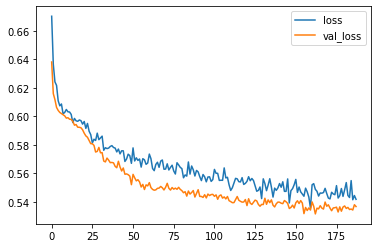

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()